# Week 4: Hypotheses from Raw Listings Data

This notebook is your workspace for this week’s assignment.

Follow the tasks in the README:
- Pull a dataset from the [form](https://docs.google.com/forms/d/e/1FAIpQLSdQQMShcp2OaFkdOclqkJN5hmWjWsowEte62WrglmW1S61Vkw/viewform?usp=header)
- Explore and clean
- Formulate and test a hypothesis about samples
- Reflect

--- 

## Setup

Import the packages you’ll need. Stick to the core libraries unless you have a strong reason to add more.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Your Dataset

You should have received one or more CSV files by email after filling out the Google Form.

Replace `'your_file.csv'` below with the path to your dataset. If you have more than one data set, it may make sense to keep the separate as we did on the Mystery Box exercise.


In [2]:
file_path = "query-results.txt"
listings = pd.read_csv(file_path,sep="\t")

listings.head(10)


,state,location,time_posted,name,make,model,year,odometer,price,title,...,drive,cylinders,fuel,type,transmission,condition,title_text,latitude,longitude,url
0,Texas,houston,2025-09-28 05:07:08,toyota camry solara sle,toyota,camry,2007.0,200000.0,3000.0,clean,...,fwd,4 cylinders,gas,coupe,automatic,good,07 TOTOYA Camery Solara SLE 2Dr Coupe Converti...,29.7477,-95.6030,https://houston.craigslist.org/cto/d/houston-0...
1,Texas,houston,2025-09-27 11:07:30,ford f-150,ford,f150,2007.0,217000.0,2500.0,clean,...,NaN,NaN,gas,SUV,automatic,NaN,2007 Ford F150 XLT Trition,29.9630,-95.4990,https://houston.craigslist.org/cto/d/houston-2...
2,Texas,houston,2025-09-24 12:41:40,ford f-150,ford,f150,2009.0,1000.0,750.0,missing,...,fwd,4 cylinders,gas,wagon,manual,fair,25ft gooseneck,29.8678,-95.8298,https://houston.craigslist.org/cto/d/katy-25ft...
3,Texas,houston,2025-09-24 09:04:52,Toyota Camry Solara,toyota,camry,2008.0,198000.0,4000.0,clean,...,NaN,6 cylinders,gas,convertible,automatic,excellent,"2008 Toyota Camry Solara "" CASH PRICE """,29.9227,-95.4939,https://houston.craigslist.org/cto/d/houston-2...
4,Texas,houston,2025-09-23 18:37:30,Toyota Camry Solara,toyota,camry,2008.0,198000.0,4000.0,clean,...,NaN,6 cylinders,gas,convertible,automatic,excellent,"2008 Toyota Camry Solara "" CASH PRICE """,29.9227,-95.4939,https://houston.craigslist.org/cto/d/houston-2...
5,Texas,houston,2025-09-22 23:35:27,toyota camry solara sle,toyota,camry,2007.0,200000.0,3500.0,clean,...,fwd,4 cylinders,gas,coupe,automatic,good,07 TOTOYA Camery Solara SLE 2Dr Coupe Converti...,29.7477,-95.6030,https://houston.craigslist.org/cto/d/houston-0...
6,Texas,texoma,2025-09-22 14:14:27,Toyota Camry,toyota,camry,2007.0,250000.0,2500.0,clean,...,4wd,4 cylinders,gas,other,automatic,good,Toyota Camry,33.5806,-96.1836,https://texoma.craigslist.org/cto/d/bonham-toy...
7,Illinois,chicago,2025-09-20 06:46:26,toyota camry solara,toyota,camry,2007.0,104000.0,4965.0,clean,...,fwd,6 cylinders,gas,convertible,automatic,like new,2007 TOYOTA SOLARA CAMRY CONVERTABLE ONE OWNER...,41.7781,-87.7069,https://chicago.craigslist.org/chc/cto/d/chica...
8,Texas,beaumont,2025-09-19 22:10:46,Toyota Camry Solara,toyota,camry,2007.0,185288.0,2000.0,clean,...,fwd,6 cylinders,gas,coupe,automatic,fair,2007 TOYOTA SOLARA,30.0948,-94.1648,https://beaumont.craigslist.org/cto/d/beaumont...
9,Illinois,chicago,2025-09-19 08:46:19,toyota camry solara convertible,toyota,camry,2007.0,123257.0,2975.0,clean,...,fwd,4 cylinders,gas,convertible,automatic,like new,TOYOTA SOLARA SLE CONVERTIBLE 2007 CLEAN 1OWNER,41.9209,-87.7043,https://chicago.craigslist.org/nch/cto/d/chica...


## Initial Exploration

Look at the structure and summary of the dataset.


In [3]:
listings.describe()

,year,odometer,price,latitude,longitude
count,16640.000000,1.663700e+04,16257.000000,16262.000000,16262.000000
mean,2008.337440,1.604322e+05,10279.550594,34.368583,-95.447524
std,7.851782,1.366656e+05,10130.252876,6.164603,5.269722
min,1931.000000,0.000000e+00,0.000000,0.000000,-122.778700
25%,2004.000000,1.150000e+05,4500.000000,29.891000,-97.691106
50%,2009.000000,1.560000e+05,7500.000000,32.643528,-96.599900
75%,2014.000000,1.942000e+05,12800.000000,41.535925,-93.636575
max,2026.000000,5.022045e+06,199000.000000,48.612225,0.000000


In [4]:
listings.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16666 entries, 0 to 16665
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         16666 non-null  object 
 1   location      16666 non-null  object 
 2   time_posted   16666 non-null  object 
 3   name          16640 non-null  object 
 4   make          16666 non-null  object 
 5   model         16666 non-null  object 
 6   year          16640 non-null  float64
 7   odometer      16637 non-null  float64
 8   price         16257 non-null  float64
 9   title         16640 non-null  object 
 10  paint         10572 non-null  object 
 11  drive         10531 non-null  object 
 12  cylinders     12181 non-null  object 
 13  fuel          16640 non-null  object 
 14  type          12570 non-null  object 
 15  transmission  16640 non-null  object 
 16  condition     12631 non-null  object 
 17  title_text    16666 non-null  object 
 18  latitude      16262 non-nu

In [5]:
listings.value_counts()

state      location      time_posted          name                       make  model  year    odometer  price    title  paint   drive  cylinders    fuel  type    transmission  condition  title_text                   latitude   longitude   url                                                                                                 
Texas      dallas        2024-06-17 09:11:11  Ford F-150                 ford  f150   2013.0  196000.0  16500.0  clean  silver  4wd    6 cylinders  gas   pickup  automatic     like new   13 Ford F 150 4x4 Super Cab  32.931000  -97.284300  https://dallas.craigslist.org/ftw/cto/d/keller-13-ford-150-4x4-super-cab/7757739678.html                25
           houston       2024-06-25 21:43:35  ford f150                  ford  f150   2014.0  221000.0  8000.0   clean  silver  rwd    6 cylinders  gas   pickup  automatic     good       2014 F150 Ford               29.795000  -95.416000  https://houston.craigslist.org/cto/d/houston-2014-f150-ford/7760463692.html

#### Q: What quirks or issues do you notice in the data?

- Are there missing values?
- Any odd or outlier entries?
- Any columns that need cleaning?

Write your answers in a Markdown or in comments.  


-Yes,there are missing values. Odometers has 33 missings values, with price 413 missings and 30 missing values for years.

-The max odometers of 500000 mileages, minimum price of $ for car listings and  max price 199000 for toyota or ford should be considered as outliers. 


In [6]:
listings.isnull().sum()


state              0
location           0
time_posted        0
name              26
make               0
model              0
year              26
odometer          29
price            409
title             26
paint           6094
drive           6135
cylinders       4485
fuel              26
type            4096
transmission      26
condition       4035
title_text         0
latitude         404
longitude        404
url                0
dtype: int64

In [7]:
# For year cutoffs
listings['year']=listings['year'].clip(2015,2025)
# For odometer cutoffs

listings['odometer']=listings['odometer'].clip(0,500000)

# For price cutoffs
min_price= 500
max_price=100000
listings['price']=listings['price'].where(listings['price'].between(0,500000))
listings.loc[listings['price']>100000,'price']=np.nan

## Cleaning

Use the techniques we’ve practiced (dropping observations, handling missing values, truncating ranges, etc.).


In [8]:
# Here are some examples, but I wouldn't use these...
# listings = listings.dropna(subset=["price"])
# listings = listings[listings["odometer"] < 300000]

clean_listings = listings.copy()


In [9]:
# All strings in lowercase.
clean_listings=clean_listings.applymap(
    lambda x: x.lower().strip() if isinstance(x, str)
    else x )

In [10]:
# Drop duplicates from `clean_listings` 
clean_listings.drop_duplicates(subset= "time_posted")

,state,location,time_posted,name,make,model,year,odometer,price,title,...,drive,cylinders,fuel,type,transmission,condition,title_text,latitude,longitude,url
0,texas,houston,2025-09-28 05:07:08,toyota camry solara sle,toyota,camry,2015.0,200000.0,3000.0,clean,...,fwd,4 cylinders,gas,coupe,automatic,good,07 totoya camery solara sle 2dr coupe converti...,29.7477,-95.6030,https://houston.craigslist.org/cto/d/houston-0...
1,texas,houston,2025-09-27 11:07:30,ford f-150,ford,f150,2015.0,217000.0,2500.0,clean,...,NaN,NaN,gas,suv,automatic,NaN,2007 ford f150 xlt trition,29.9630,-95.4990,https://houston.craigslist.org/cto/d/houston-2...
2,texas,houston,2025-09-24 12:41:40,ford f-150,ford,f150,2015.0,1000.0,750.0,missing,...,fwd,4 cylinders,gas,wagon,manual,fair,25ft gooseneck,29.8678,-95.8298,https://houston.craigslist.org/cto/d/katy-25ft...
3,texas,houston,2025-09-24 09:04:52,toyota camry solara,toyota,camry,2015.0,198000.0,4000.0,clean,...,NaN,6 cylinders,gas,convertible,automatic,excellent,"2008 toyota camry solara "" cash price """,29.9227,-95.4939,https://houston.craigslist.org/cto/d/houston-2...
4,texas,houston,2025-09-23 18:37:30,toyota camry solara,toyota,camry,2015.0,198000.0,4000.0,clean,...,NaN,6 cylinders,gas,convertible,automatic,excellent,"2008 toyota camry solara "" cash price """,29.9227,-95.4939,https://houston.craigslist.org/cto/d/houston-2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,texas,dallas,2025-09-07 15:38:42,toyota camry le,toyota,camry,2015.0,183000.0,3600.0,clean,...,fwd,4 cylinders,gas,sedan,automatic,good,forfor sale 2006 toyota camry it's good runnin...,32.9227,-96.6248,https://dallas.craigslist.org/dal/cto/d/garlan...
16661,minnesota,brainerd,2025-09-07 10:15:14,toyota camry le sedan,toyota,camry,2015.0,155300.0,3600.0,clean,...,fwd,4 cylinders,gas,sedan,automatic,good,1999 toyota camry,46.3859,-94.2663,https://brainerd.craigslist.org/cto/d/baxter-1...
16662,texas,dallas,2025-09-07 08:55:26,toyota camry le,toyota,camry,2015.0,183000.0,3800.0,clean,...,fwd,4 cylinders,gas,sedan,automatic,good,forfor sale 2006 toyota camry it's good runnin...,32.9227,-96.6248,https://dallas.craigslist.org/dal/cto/d/garlan...
16663,illinois,chicago,2025-09-07 07:07:37,toyota camry,toyota,camry,2015.0,124000.0,5400.0,clean,...,NaN,NaN,gas,sedan,automatic,good,2010 toyota camry,41.7621,-87.6834,https://chicago.craigslist.org/chc/cto/d/chica...


In [11]:
clean_listings_TC = clean_listings[(clean_listings['make'] == 'toyota') & (clean_listings['model'] == 'camry')] 

clean_listings_F150 = clean_listings[(clean_listings['make'] == 'ford') & (clean_listings['model'] == 'f150')]

In [12]:
clean_listings_TC.describe()

,year,odometer,price,latitude,longitude
count,2160.000000,2160.000000,2104.000000,2105.000000,2105.000000
mean,2015.418981,153046.880556,6191.850760,35.254081,-94.404142
std,1.384394,59327.058963,4838.531413,6.165396,5.811338
min,2015.000000,1000.000000,1.000000,0.000000,-108.330201
25%,2015.000000,118000.000000,3019.500000,29.976600,-97.218100
50%,2015.000000,156184.000000,4900.000000,32.847900,-95.634000
75%,2015.000000,190000.000000,7500.000000,41.945300,-93.036700
max,2025.000000,500000.000000,39500.000000,47.513300,0.000000


In [13]:
clean_listings_F150.describe()

,year,odometer,price,latitude,longitude
count,14480.000000,14477.000000,14135.000000,14157.000000,14157.000000
mean,2015.616851,155257.561719,10737.772409,34.236919,-95.602664
std,1.624674,69544.985088,9643.643231,6.153830,5.166619
min,2015.000000,0.000000,0.000000,0.000000,-122.778700
25%,2015.000000,114500.000000,4800.000000,29.875400,-97.742600
50%,2015.000000,156000.000000,7900.000000,32.577300,-96.622800
75%,2015.000000,195000.000000,13500.000000,41.324720,-93.996000
max,2025.000000,500000.000000,100000.000000,48.612225,0.000000


In [14]:
clean_listings['year']=clean_listings['year'].clip(2015,2025)
# For odometer cutoffs

clean_listings['odometer']=clean_listings['odometer'].clip(0,300000)

# For price cutoffs
min_price= 500
max_price=100000
clean_listings['price']=clean_listings['price'].where(clean_listings['price'].between(0,100000))
clean_listings.loc[clean_listings['price']>100000,'price']=np.nan

In [15]:
clean_listings.head()

,state,location,time_posted,name,make,model,year,odometer,price,title,...,drive,cylinders,fuel,type,transmission,condition,title_text,latitude,longitude,url
0,texas,houston,2025-09-28 05:07:08,toyota camry solara sle,toyota,camry,2015.0,200000.0,3000.0,clean,...,fwd,4 cylinders,gas,coupe,automatic,good,07 totoya camery solara sle 2dr coupe converti...,29.7477,-95.6030,https://houston.craigslist.org/cto/d/houston-0...
1,texas,houston,2025-09-27 11:07:30,ford f-150,ford,f150,2015.0,217000.0,2500.0,clean,...,NaN,NaN,gas,suv,automatic,NaN,2007 ford f150 xlt trition,29.9630,-95.4990,https://houston.craigslist.org/cto/d/houston-2...
2,texas,houston,2025-09-24 12:41:40,ford f-150,ford,f150,2015.0,1000.0,750.0,missing,...,fwd,4 cylinders,gas,wagon,manual,fair,25ft gooseneck,29.8678,-95.8298,https://houston.craigslist.org/cto/d/katy-25ft...
3,texas,houston,2025-09-24 09:04:52,toyota camry solara,toyota,camry,2015.0,198000.0,4000.0,clean,...,NaN,6 cylinders,gas,convertible,automatic,excellent,"2008 toyota camry solara "" cash price """,29.9227,-95.4939,https://houston.craigslist.org/cto/d/houston-2...
4,texas,houston,2025-09-23 18:37:30,toyota camry solara,toyota,camry,2015.0,198000.0,4000.0,clean,...,NaN,6 cylinders,gas,convertible,automatic,excellent,"2008 toyota camry solara "" cash price """,29.9227,-95.4939,https://houston.craigslist.org/cto/d/houston-2...


#### Q: What cleaning steps did you apply and why?

The cleaning steps are,  dropping all the duplicates in my dataset and standized all the strings in lowercase. I also cutoff the extremes numerical values ( odometer, price, year ). For the odometer and year I replace the outliers with max and min and the price the extreme values with missings values.  


--- 

## Formulating a Hypothesis

Your hypothesis should:
- Involve **samples**, not whole populations.
- Include a **statistic** and a **reference distribution** (data generating process).

Example: *A sample of 50 Camrys from 2015–2020 in California will have higher mileage than a sample of 50 Camrys from Texas.*

#### Q: State your hypothesis here

<!-- Your answer down here. But remove these comments characters. -->



Hypotesis: The average price of 50 ford f150 samples from 2015–2025 in Minneapolis will be higher than the average price of 50 ford f150 from Dallas.

## Testing Your Hypothesis 

Use the tools you know so far:
- Sampling (`.sample()`)
- Grouping (`.groupby()`)
- Simple comparisons and plots


In [16]:
clean_listings_F150.head()

,state,location,time_posted,name,make,model,year,odometer,price,title,...,drive,cylinders,fuel,type,transmission,condition,title_text,latitude,longitude,url
1,texas,houston,2025-09-27 11:07:30,ford f-150,ford,f150,2015.0,217000.0,2500.0,clean,...,NaN,NaN,gas,suv,automatic,NaN,2007 ford f150 xlt trition,29.9630,-95.4990,https://houston.craigslist.org/cto/d/houston-2...
2,texas,houston,2025-09-24 12:41:40,ford f-150,ford,f150,2015.0,1000.0,750.0,missing,...,fwd,4 cylinders,gas,wagon,manual,fair,25ft gooseneck,29.8678,-95.8298,https://houston.craigslist.org/cto/d/katy-25ft...
11,texas,waco,2025-09-16 17:53:57,ford f-150,ford,f150,2015.0,140000.0,8700.0,clean,...,rwd,6 cylinders,gas,van,manual,excellent,gray man ford econoline van for sale,31.3267,-97.2342,https://waco.craigslist.org/cto/d/bruceville-g...
15,texas,brownsville,2025-09-11 16:46:54,ford f150,ford,f150,2015.0,147000.0,2550.0,clean,...,NaN,8 cylinders,gas,suv,automatic,good,bonita 2004 f150 (placas vigentes 01/26) lea t...,26.1337,-97.6447,https://brownsville.craigslist.org/cto/d/san-b...
16,texas,houston,2025-09-06 13:52:17,ford f-150,ford,f150,2015.0,1000.0,750.0,missing,...,fwd,4 cylinders,gas,wagon,manual,fair,25ft gooseneck,29.8678,-95.8298,https://houston.craigslist.org/cto/d/katy-25ft...


In [17]:


mpls_f150_price = clean_listings_F150[clean_listings_F150['location'] == 'minneapolis']['price'].dropna()
dallas_f150_price = clean_listings_F150[clean_listings_F150['location'] == 'dallas']['price'].dropna()

In [18]:
mpls_f150_price.head()

85     2850.0
207    5450.0
210    5850.0
231    7500.0
261    3750.0
Name: price, dtype: float64

In [19]:
mpls_F150_sample = mpls_f150_price.sample(50, random_state=42)


In [20]:
dallas_F150_sample = dallas_f150_price.sample(50, random_state=42)

In [23]:
diff_means = []
n = 1_000  

for i in range(n):
    mpls_F150_sample = np.random.choice(mpls_f150_price, size=len(mpls_f150_price), replace=True)
    dallas_F150_sample = np.random.choice(dallas_f150_price, size=len(dallas_f150_price), replace=True)
    
    mpls_mean = np.mean(mpls_F150_sample)
    dallas_mean = np.mean(dallas_F150_sample)
    
    diff = mpls_mean - dallas_mean
    diff_means.append(diff)


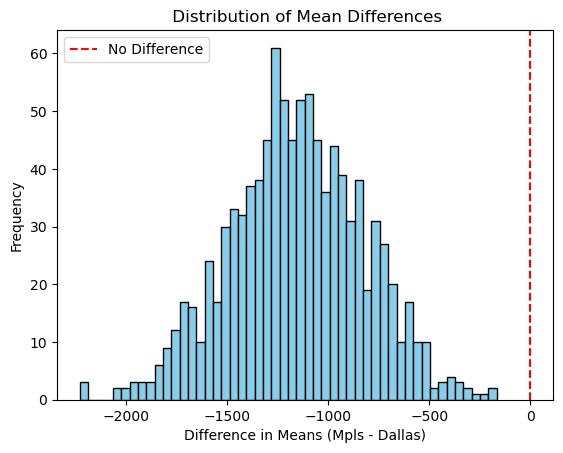

In [25]:
plt.hist(diff_means, bins=50, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.xlabel('Difference in Means (Mpls - Dallas)')
plt.ylabel('Frequency')
plt.title(' Distribution of Mean Differences')
plt.legend()
plt.show()

The histogram shows distribution center around -1000. The distribution mean difference showed that f150 price in dallas is more expensive than f150 in minneapolis. 

# Repeat the analysis without the cleaning 

In [ ]:

listings.describe()

,year,odometer,price,latitude,longitude
count,16640.000000,16637.000000,16239.000000,16262.000000,16262.000000
mean,2015.591166,154970.546553,10148.781760,34.368583,-95.447524
std,1.596877,68307.195912,9290.446307,6.164603,5.269722
min,2015.000000,0.000000,0.000000,0.000000,-122.778700
25%,2015.000000,115000.000000,4500.000000,29.891000,-97.691106
50%,2015.000000,156000.000000,7500.000000,32.643528,-96.599900
75%,2015.000000,194200.000000,12700.000000,41.535925,-93.636575
max,2025.000000,500000.000000,100000.000000,48.612225,0.000000


In [ ]:
#Calculate the average price for ford f150 by location

f150_avg_price = (
    listings[(listings["make"] == "ford") & (listings["model"] == "f150")]
    .groupby("location")["price"]
    .mean()
    .reset_index()
    .sort_values("price", ascending=False)
)
print(listings)

           state  location          time_posted                     name  \
0          Texas   houston  2025-09-28 05:07:08  toyota camry solara sle   
1          Texas   houston  2025-09-27 11:07:30               ford f-150   
2          Texas   houston  2025-09-24 12:41:40               ford f-150   
3          Texas   houston  2025-09-24 09:04:52      Toyota Camry Solara   
4          Texas   houston  2025-09-23 18:37:30      Toyota Camry Solara   
...          ...       ...                  ...                      ...   
16661  Minnesota  brainerd  2025-09-07 10:15:14    Toyota Camry LE Sedan   
16662      Texas    dallas  2025-09-07 08:55:26          toyota camry le   
16663   Illinois   chicago  2025-09-07 07:07:37             toyota camry   
16664   Illinois   chicago  2025-09-06 21:13:12             toyota camry   
16665   Illinois   chicago  2025-09-06 21:13:12             Toyota Camry   

         make  model    year  odometer   price    title  ... drive  \
0      toyota  ca

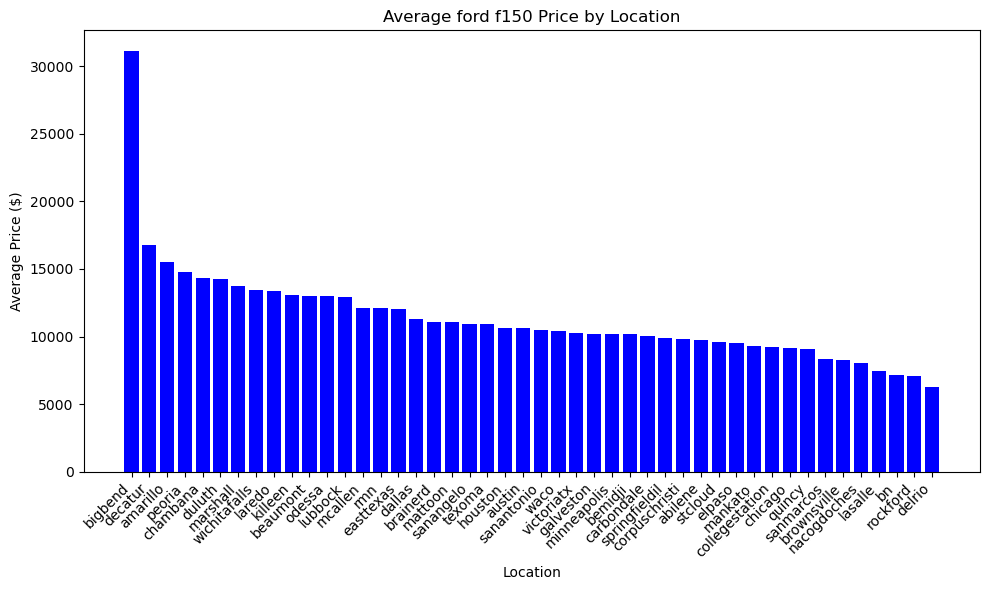

In [ ]:
# Step 3: Plot chart for ford f150
plt.figure(figsize=(10,6))
plt.bar(f150_avg_price['location'], f150_avg_price['price'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.title("Average ford f150 Price by Location")
plt.ylabel("Average Price ($)")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

#### Q: What do your samples suggest about your hypothesis?
My samples confirm my hypothesis that The average price of 50 ford f150 samples from 2015–2025 in Minneapolis will be higher than the average price of 50 ford f150 from Dallas.The bar grapph showed an average price of almost 25k in minneapolis whole in Dallas it is around 10k.




## Reflection

- What did you conclude?
In short, my hypothesis has been confirmed. I decided toi test this hypothesis because I had some of my friends gone to Texas many times to by their car. 
- Re-run your analysis without cleaning (or with minimal cleaning). Did your conclusions change?
Yes, mine hypothesis change. when re-running the data without cleaning, The average price of sample of 50 ford f150 samples from 2015–2025 in Minneapolis is lower than the average price of sample of 50 ford f150 from Dallas. 
- If you had drawn a different sample, how might your conclusions have changed?  
I believe that the difference came from the extreme values ( outliers) in my sample. To avaid that we truncated our data during the cleaning process and the sample size her 50. 
- How does thinking in terms of **samples** (rather than entire populations) change the way you interpret your results?
When analyzing a sample from a dataset rather than the entire data, it changes how confident I am regarding the iterpretation of my result.Therefore, the sample only describe the 50 samples rather than the entire listings. 



#### Write your reflection below here

